# ROUGE and BERT Score Evaluation Tool #

Evaluate prompt engineering results from different LLMs by comparing model outputs against a ground truth using ROUGE and BERT metrics. 

## ROUGE score evaluation ##
This script calculates **ROUGE-1**, **ROUGE-2**, and **ROUGE-L** (**Precision**, **Recall**, **F1-score**) and identifies the best-performing model.

**1. Prepare Your Files**  
Ground Truth (GT): A reference text file (e.g., human-written summary)  
Model Outputs: Text files from different models (e.g., Gemini, LLaMA)  

**2. Configure Paths**  
Replace these example paths with your actual files:  

```python
files_to_compare = {
    'Model1': '/path/to/model1_output.txt',
    'Model2': '/path/to/model2_output.txt', 
}
```
**3. Execute the Script**  
```python
evaluate_and_display(
    gt_file='/path/to/ground_truth.txt',
    model_files=files_to_compare
)
```

## BERT score evaluation ##
This script calculates BERT score and identifies the best-performing model.

**1. Prepare Your Files**  
Ground Truth (GT): A reference text file (e.g., human-written summary)  
Model Outputs: Text files from different models (e.g., Gemini, LLaMA)  

**2. Configure Paths**  
Replace these example paths with your actual files:  

```python
files_to_compare = {
    'Model1': '/path/to/model1_output.txt',
    'Model2': '/path/to/model2_output.txt', 
}
```
**3. Execute the Script**  
```python  
bert_scores = evaluate_with_bertscore(
    gt_file='/path/to/ground_truth.txt',
    model_files=files_to_compare
    )

```


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from rouge_score import rouge_scorer

def load_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read()

def compare_reports_rouge(ground_truth, model_reports):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    return {model: scorer.score(ground_truth, text) for model, text in model_reports.items()}

def plot_rouge_scores(rouge_scores):
    models = list(rouge_scores.keys())
    rouge1_fmeasure = [rouge_scores[model]['rouge1'].fmeasure for model in models]
    rouge2_fmeasure = [rouge_scores[model]['rouge2'].fmeasure for model in models]
    rougeL_fmeasure = [rouge_scores[model]['rougeL'].fmeasure for model in models]

    x = np.arange(len(models)) 
    width = 0.2  
    
    plt.rcParams.update({'font.size': 14})
    fig, ax = plt.subplots(figsize=(8, 6))
    
    rects1 = ax.bar(x - width, rouge1_fmeasure, width, label='ROUGE-1', color='lightblue')
    rects2 = ax.bar(x, rouge2_fmeasure, width, label='ROUGE-2', color='lightgreen')
    rects3 = ax.bar(x + width, rougeL_fmeasure, width, label='ROUGE-L', color='salmon')
    
    ax.set_xlabel('Models', fontsize=16)
    ax.set_ylabel('F-measure', fontsize=16)
    ax.set_title('ROUGE Scores by Model and Metric', fontsize=18)
    ax.set_xticks(x)
    ax.set_xticklabels(models, fontsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.legend(fontsize=14)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=12)  
    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    plt.tight_layout()
    plt.show()


def evaluate_and_display_rouge(gt_file, model_files):
    gt_text = load_text(gt_file)
    model_reports = {name: load_text(path) for name, path in model_files.items()}
    
    rouge_scores = compare_reports_rouge(gt_text, model_reports)
    
    # Display results
    best_model, best_f1 = None, -1.0
    for model, scores in rouge_scores.items():
        print(f"\nROUGE Scores for {model}:")
        print("-" * 60)
        print(f"ROUGE-1:  Precision: {scores['rouge1'].precision:.4f},  Recall: {scores['rouge1'].recall:.4f},  F1: {scores['rouge1'].fmeasure:.4f}")
        print(f"ROUGE-2:  Precision: {scores['rouge2'].precision:.4f},  Recall: {scores['rouge2'].recall:.4f},  F1: {scores['rouge2'].fmeasure:.4f}")
        print(f"ROUGE-L:  Precision: {scores['rougeL'].precision:.4f},  Recall: {scores['rougeL'].recall:.4f},  F1: {scores['rougeL'].fmeasure:.4f}")
        
        if scores['rougeL'].fmeasure > best_f1:
            best_f1 = scores['rougeL'].fmeasure
            best_model = model
    
    print("\n" + "=" * 60)
    print(f"Best Model: {best_model} (ROUGE-L F1: {best_f1:.4f})")
    print("=" * 60)

    plot_rouge_scores(rouge_scores)



ROUGE Scores for Gams:
------------------------------------------------------------
ROUGE-1:  Precision: 0.5194,  Recall: 0.5877,  F1: 0.5514
ROUGE-2:  Precision: 0.3125,  Recall: 0.3540,  F1: 0.3320
ROUGE-L:  Precision: 0.4031,  Recall: 0.4561,  F1: 0.4280

ROUGE Scores for Deepseek:
------------------------------------------------------------
ROUGE-1:  Precision: 0.4260,  Recall: 0.6316,  F1: 0.5088
ROUGE-2:  Precision: 0.2500,  Recall: 0.3717,  F1: 0.2989
ROUGE-L:  Precision: 0.3314,  Recall: 0.4912,  F1: 0.3958

ROUGE Scores for Gemini:
------------------------------------------------------------
ROUGE-1:  Precision: 0.4320,  Recall: 0.6404,  F1: 0.5159
ROUGE-2:  Precision: 0.2619,  Recall: 0.3894,  F1: 0.3132
ROUGE-L:  Precision: 0.3254,  Recall: 0.4825,  F1: 0.3887

ROUGE Scores for Llama:
------------------------------------------------------------
ROUGE-1:  Precision: 0.3202,  Recall: 0.5000,  F1: 0.3904
ROUGE-2:  Precision: 0.1977,  Recall: 0.3097,  F1: 0.2414
ROUGE-L:  Preci

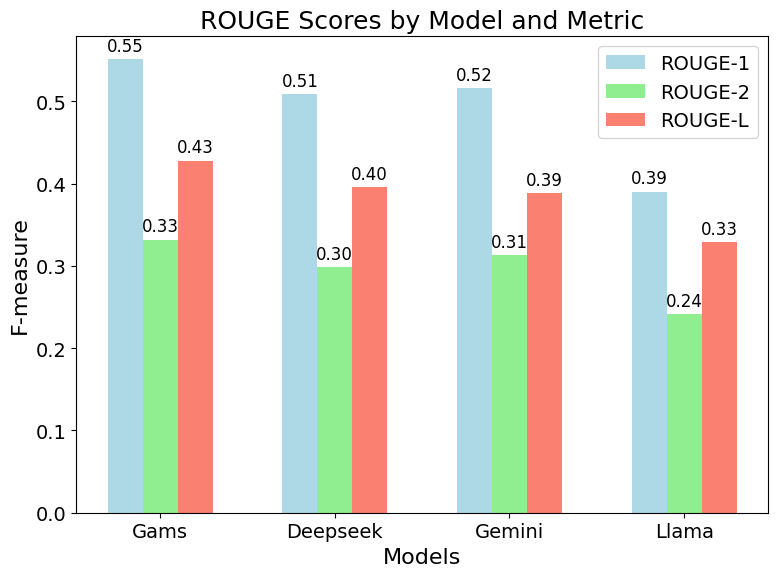

In [ ]:
# Compute and display ROUGE scores for the models
files_to_compare = {
        'Gams': 'data/gams.rtf',
        'Deepseek': 'data/Deepseek.rtf',
        'Gemini': 'data/Gemini.rtf',
        'Llama': 'data/llama.rtf'
    }

evaluate_and_display_rouge(
        gt_file='data/GT.rtf',
        model_files=files_to_compare
    )

In [5]:
from bert_score import score
from striprtf.striprtf import rtf_to_text
import matplotlib.pyplot as plt
import numpy as np
from transformers import logging
logging.set_verbosity_error()

def load_rtf(file_path):
    """Load and convert RTF file to plain text"""
    with open(file_path, 'rb') as file:
        rtf_content = file.read()
    return rtf_to_text(rtf_content.decode('utf-8', errors='ignore'))


def evaluate_with_bertscore(gt_file, model_files, plot_path='bertscore_results.pdf'):
    ground_truth = load_rtf(gt_file)
    model_texts = {name: load_rtf(path) for name, path in model_files.items()}
    bert_scores = {}
    best_model, best_f1 = None, -1.0
    
    print("\nBERTScore Evaluation Results:")
    print("=" * 60)
    
    for model_name, model_output in model_texts.items():
        P, R, F1 = score([model_output], [ground_truth], lang='en', verbose=False)
        
        bert_scores[model_name] = {
            'P': P.mean().item(),
            'R': R.mean().item(),
            'F1': F1.mean().item()
        }
        
        print(f"BERT Scores for {model_name}:")
        print(f"Precision: {bert_scores[model_name]['P']:.4f},  "
      f"Recall: {bert_scores[model_name]['R']:.4f},  "
      f"F1: {bert_scores[model_name]['F1']:.4f}")
        print("-" * 60)
        
        if bert_scores[model_name]['F1'] > best_f1:
            best_f1 = bert_scores[model_name]['F1']
            best_model = model_name
    

    
    print("\n" + "=" * 60)
    print(f"Best Model: {best_model} (BERTScore F1: {best_f1:.4f})")
    print("=" * 60)
    
    return bert_scores

In [6]:
# Compute and display BERT scores for the models
model_files = {
        'Gams': 'data/gams.rtf',
        'Deepseek': 'data/Deepseek.rtf',
        'Gemini': 'data/Gemini.rtf',
        'Llama': 'data/llama.rtf'
    }
    
bert_scores = evaluate_with_bertscore(
        gt_file='data/GT.rtf',
        model_files=model_files
    )


BERTScore Evaluation Results:
BERT Scores for Gams:
Precision: 0.8566,  Recall: 0.8613,  F1: 0.8589
------------------------------------------------------------
BERT Scores for Deepseek:
Precision: 0.8534,  Recall: 0.8728,  F1: 0.8630
------------------------------------------------------------
BERT Scores for Gemini:
Precision: 0.8565,  Recall: 0.8710,  F1: 0.8637
------------------------------------------------------------
BERT Scores for Llama:
Precision: 0.8197,  Recall: 0.8403,  F1: 0.8299
------------------------------------------------------------

Best Model: Gemini (BERTScore F1: 0.8637)
